In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

dataset = read_csv('Ladesaeulenregister_CSV.csv', sep=';', decimal=',',encoding="ISO-8859-1").drop_duplicates(keep='first')

list_columns = ['Betreiber', 'Anschlussleistung', 'Anzahl Ladepunkte', 'P1 [kW]']
dataset = dataset[list_columns]

/var/folders/kz/pkskn3bs73d__4940dfhqwcr0000gn/T/ipykernel_41002/1117759019.py:18: DtypeWarning: Columns (8,9,24) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = read_csv('Ladesaeulenregister_CSV.csv', sep=';', decimal=',',encoding="ISO-8859-1").drop_duplicates(keep='first')


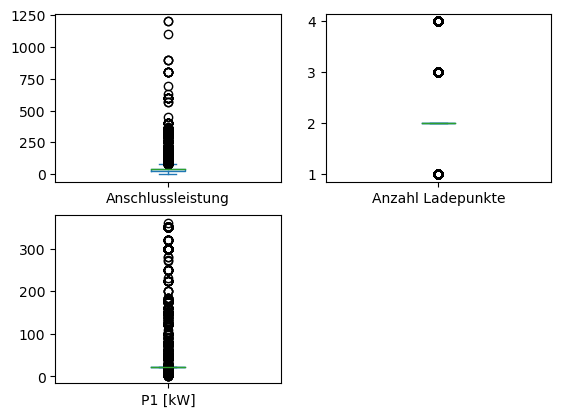

In [3]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

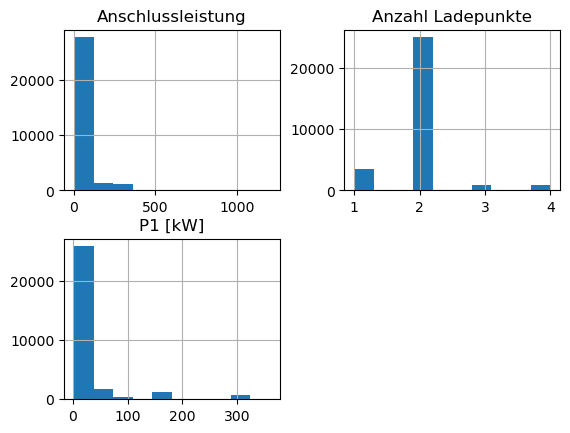

In [4]:
# histograms
dataset.hist()
pyplot.show()

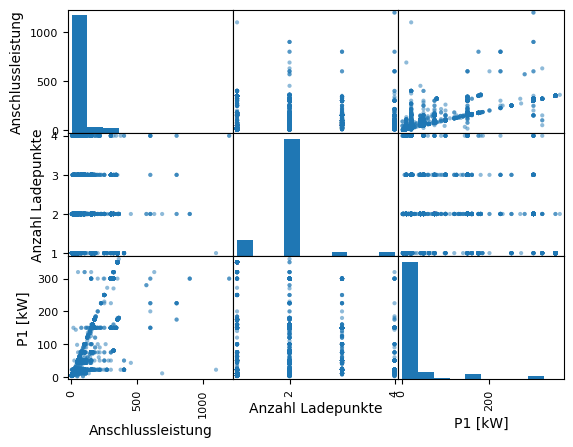

In [5]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [8]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:3]
y = array[:,3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [9]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.